### Importing necessary libraries required for the analysis

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Import CSV Data as panda data frame

In [2]:
#df = pd.read_csv('C:/Users/Alicia/Desktop/Self_Development/JustIT/Python/sales_data_sample.csv', encoding ='latin1')
df = pd.read_excel('C:/Users/Alicia/Desktop/Self_Development/JustIT/Python/sales_data_sample.xlsx')
#my_stock_df = pd.read_excel('stocks.xlsx', sheet_name=None)

In [3]:
df.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

### Show top 5 records of the dataset

In [4]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


### Show last 5 records of the dataset

In [5]:
df.tail()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
2818,10350,20,100.00,15,2244.40,2004-12-02,Shipped,4,12,2004,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,2005-01-31,Shipped,1,1,2005,...,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,2005-03-01,Resolved,1,3,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,2005-03-28,Shipped,1,3,2005,...,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small
2822,10414,47,65.52,9,3079.44,2005-05-06,On Hold,2,5,2005,...,8616 Spinnaker Dr.,NaN,Boston,MA,51003,USA,NaN,Yoshido,Juri,Medium


### Checking basic information in the dataset e.g.
### 1.  Data types of each fields
### 2.  Total number of data points (i.e 2823 total rows)
### 3.  Fields with null values (i.e Addressline2, State, Postalcode, Territory)
### 4.  No of fields (i.e 25 columns)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ORDERNUMBER       2823 non-null   int64         
 1   QUANTITYORDERED   2823 non-null   int64         
 2   PRICEEACH         2823 non-null   float64       
 3   ORDERLINENUMBER   2823 non-null   int64         
 4   SALES             2823 non-null   float64       
 5   ORDERDATE         2823 non-null   datetime64[ns]
 6   STATUS            2823 non-null   object        
 7   QTR_ID            2823 non-null   int64         
 8   MONTH_ID          2823 non-null   int64         
 9   YEAR_ID           2823 non-null   int64         
 10  PRODUCTLINE       2823 non-null   object        
 11  MSRP              2823 non-null   int64         
 12  PRODUCTCODE       2823 non-null   object        
 13  CUSTOMERNAME      2823 non-null   object        
 14  PHONE             2823 n

### Fields with missing values are;

### 1. ADDRESSLINE2
### 2. STATE
### 3. POSTALCODE
### 4. TERRITORY

In [7]:
# put all the missing value fields in a variable
missing_value_fields = ['ADDRESSLINE2','STATE','POSTALCODE','TERRITORY']

In [8]:
# compute and input the missing values with the mode of the field
missing_value_fields_mode_value=[]
for i in missing_value_fields:
    missing_value_fields_mode_value.append(df[i].mode()[0])
    print("Mode Value for {col} field is: {mode}".format(col=i, mode= df[i].mode()[0]))

Mode Value for ADDRESSLINE2 field is: Level 3
Mode Value for STATE field is: CA
Mode Value for POSTALCODE field is: 28034
Mode Value for TERRITORY field is: EMEA


### Imputing frequent values (i.e mode) in the missing value features

In [9]:
# fixing missing values with the mode value of each column
j=0
for i in missing_value_fields:
    df.loc[df[i].isna(),i] = missing_value_fields_mode_value[j]
    j=j+1

In [10]:
# all missing values columns has been imputed with the most frequest value in each field.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ORDERNUMBER       2823 non-null   int64         
 1   QUANTITYORDERED   2823 non-null   int64         
 2   PRICEEACH         2823 non-null   float64       
 3   ORDERLINENUMBER   2823 non-null   int64         
 4   SALES             2823 non-null   float64       
 5   ORDERDATE         2823 non-null   datetime64[ns]
 6   STATUS            2823 non-null   object        
 7   QTR_ID            2823 non-null   int64         
 8   MONTH_ID          2823 non-null   int64         
 9   YEAR_ID           2823 non-null   int64         
 10  PRODUCTLINE       2823 non-null   object        
 11  MSRP              2823 non-null   int64         
 12  PRODUCTCODE       2823 non-null   object        
 13  CUSTOMERNAME      2823 non-null   object        
 14  PHONE             2823 n

In [11]:
#reading through bottom 5 rows in the dataset
df.tail()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
2818,10350,20,100.00,15,2244.40,2004-12-02,Shipped,4,12,2004,...,"C/ Moralzarzal, 86",Level 3,Madrid,CA,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,2005-01-31,Shipped,1,1,2005,...,Torikatu 38,Level 3,Oulu,CA,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,2005-03-01,Resolved,1,3,2005,...,"C/ Moralzarzal, 86",Level 3,Madrid,CA,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,2005-03-28,Shipped,1,3,2005,...,1 rue Alsace-Lorraine,Level 3,Toulouse,CA,31000,France,EMEA,Roulet,Annette,Small
2822,10414,47,65.52,9,3079.44,2005-05-06,On Hold,2,5,2005,...,8616 Spinnaker Dr.,Level 3,Boston,MA,51003,USA,EMEA,Yoshido,Juri,Medium


### Create a variable for categorical fields
### Status, Dealsize and Territory are the non numeral field with smallest unique values
### Hence, they are categorical features

In [12]:
# create a variable for categorical fields
for i in df.columns:
    print("{col}   has   {vals}   unique data values".format(col=i, vals= len(df[i].unique())))
    
categorical_feature = ['STATUS','DEALSIZE','TERRITORY']

ORDERNUMBER   has   307   unique data values
QUANTITYORDERED   has   58   unique data values
PRICEEACH   has   1016   unique data values
ORDERLINENUMBER   has   18   unique data values
SALES   has   2763   unique data values
ORDERDATE   has   252   unique data values
STATUS   has   6   unique data values
QTR_ID   has   4   unique data values
MONTH_ID   has   12   unique data values
YEAR_ID   has   3   unique data values
PRODUCTLINE   has   7   unique data values
MSRP   has   80   unique data values
PRODUCTCODE   has   109   unique data values
CUSTOMERNAME   has   92   unique data values
PHONE   has   91   unique data values
ADDRESSLINE1   has   92   unique data values
ADDRESSLINE2   has   9   unique data values
CITY   has   73   unique data values
STATE   has   16   unique data values
POSTALCODE   has   73   unique data values
COUNTRY   has   19   unique data values
TERRITORY   has   3   unique data values
CONTACTLASTNAME   has   77   unique data values
CONTACTFIRSTNAME   has   72   un

### Exploring unique values in each categorical fields in the dataset
### 1. Sales with Shipped Status has the highest datapoint of 2617 records.
### 2. Dealsize Sales of medium is the most sales with a value of 1384 records
### 3. Lastly, EMEA territory is the territory with the highest number of sales with a value of 2481


In [13]:
for i in categorical_feature:
    print("{vals}".format(col=i, vals= df[i].value_counts()))

Shipped       2617
Cancelled       60
Resolved        47
On Hold         44
In Process      41
Disputed        14
Name: STATUS, dtype: int64
Medium    1384
Small     1282
Large      157
Name: DEALSIZE, dtype: int64
EMEA     2481
APAC      221
Japan     121
Name: TERRITORY, dtype: int64


In [14]:
# change the data type of the orderdate to date
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])

In [15]:
# create a new column for month from the orderdate column
df['month'] = pd.DatetimeIndex(df['ORDERDATE']).month
# create a new column for year from the orderdate column
df['year'] = pd.DatetimeIndex(df['ORDERDATE']).year
# create a new column for the combination of month and year from the orderdate column
df['month_year'] = df['ORDERDATE'].dt.to_period('M')
# change the field data type tp string
df['month_year'] = df['month_year'].astype(str)
# Sort the dataset in the ascending order of orderdate column
df = df.sort_values(by = 'ORDERDATE')
df

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,month,year,month_year
578,10100,30,100.00,3,5151.00,2003-01-06,Shipped,1,1,2003,...,NH,62005,USA,EMEA,Young,Valarie,Medium,1,2003,2003-01
680,10100,50,67.80,2,3390.00,2003-01-06,Shipped,1,1,2003,...,NH,62005,USA,EMEA,Young,Valarie,Medium,1,2003,2003-01
1267,10100,22,86.51,4,1903.22,2003-01-06,Shipped,1,1,2003,...,NH,62005,USA,EMEA,Young,Valarie,Small,1,2003,2003-01
2024,10100,49,34.47,1,1689.03,2003-01-06,Shipped,1,1,2003,...,NH,62005,USA,EMEA,Young,Valarie,Small,1,2003,2003-01
1539,10101,45,31.20,3,1404.00,2003-01-09,Shipped,1,1,2003,...,CA,60528,Germany,EMEA,Keitel,Roland,Small,1,2003,2003-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2405,10425,18,100.00,2,1895.94,2005-05-31,In Process,2,5,2005,...,CA,44000,France,EMEA,Labrune,Janine,Small,5,2005,2005-05
393,10425,33,100.00,4,4692.60,2005-05-31,In Process,2,5,2005,...,CA,44000,France,EMEA,Labrune,Janine,Medium,5,2005,2005-05
160,10425,38,100.00,12,5894.94,2005-05-31,In Process,2,5,2005,...,CA,44000,France,EMEA,Labrune,Janine,Medium,5,2005,2005-05
2302,10424,44,61.41,2,2702.04,2005-05-31,In Process,2,5,2005,...,CA,28034,Spain,EMEA,Freyre,Diego,Small,5,2005,2005-05


In [16]:
# checking the number of years in the dataset
df['year'].unique()

array([2003, 2004, 2005], dtype=int64)

In [17]:
_df = df[['month_year','year','SALES']]

In [18]:
# summarising sales by month_year and year
_df = _df.groupby(['month_year','year'], as_index=False)["SALES"].sum()

### 1. The highest sales in the dataset happened in November 2004 with a value of 1089048.01.
### 2. The lowest sales was in January 2003. The value was 129753.60.
### 3. A regular spike is sales in Novembers was observed, and also a significant drop in Decembers.
### 4. Lastly, an almost steady sales with no significant different was also observed between 200403 and 200404.

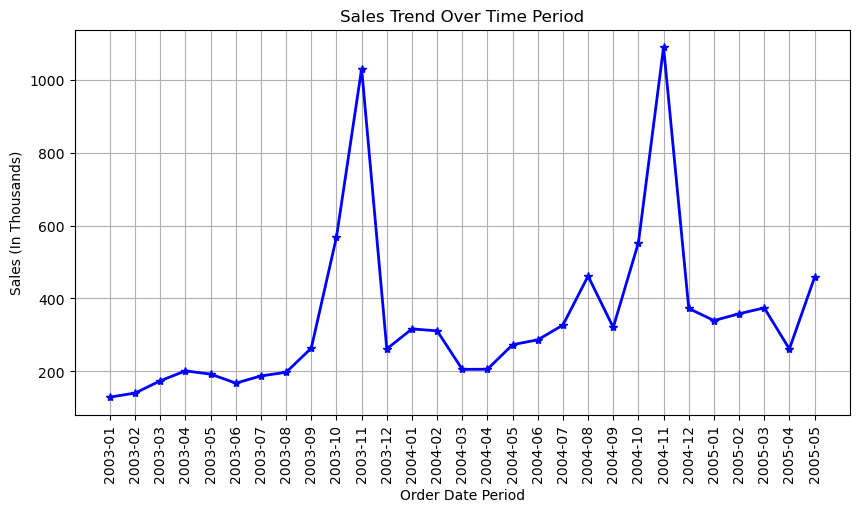

In [19]:
fig = plt.figure(figsize = (10, 5))
plt.plot(_df['month_year'], _df['SALES']/1000, color = 'blue', linewidth=2, marker = '*')
plt.xticks(_df['month_year'], rotation='vertical')
plt.xlabel("Order Date Period")
plt.ylabel("Sales (In Thousands)")
plt.title("Sales Trend Over Time Period")
plt.grid(True)
plt.show()

In [20]:
# its assumed region is same as territory
df['TERRITORY'].unique()

array(['EMEA', 'Japan', 'APAC'], dtype=object)

In [21]:
# update territory to APAC where current value is Japan in the dataset
df.loc[df['TERRITORY'] == 'Japan','TERRITORY'] = 'APAC'
df['TERRITORY'].unique()

array(['EMEA', 'APAC'], dtype=object)

In [22]:
#aggregate the sales by territory
_df =  df[['TERRITORY','SALES']]
_df = _df.groupby(['TERRITORY'], as_index=False)["SALES"].sum()

In [23]:
_df

,TERRITORY,SALES
0,APAC,1201295.05
1,EMEA,8831333.80


### 1. Overall, EMEA region has the largest distribution of sales (i.e 88.0% with a value of 8,831,333.00)
### 2. While APAC region has only 12% share of overall sales with a value of 1,201,294 only.

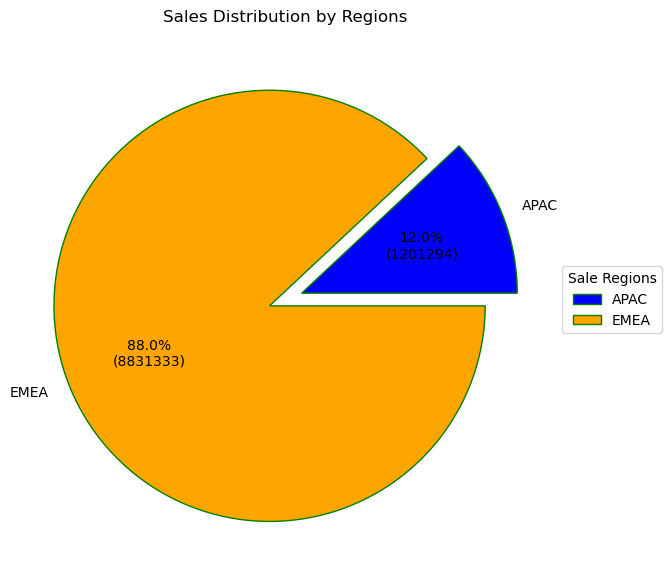

In [24]:
label = _df['TERRITORY']
data = _df['SALES']
explode = (0.08, 0.08)
wedge_properties = {'linewidth': 1, 'edgecolor': "green"}
color = ["blue", "orange"]

def label_format(pct, all_values):
    absolute = int(pct / 100. * np.sum(all_values))
    return f"{pct:.1f}%\n({absolute})"

plt.figure(figsize=(10, 7))
plt.pie(data, labels=label, explode = explode, colors = color, wedgeprops = wedge_properties, 
        autopct=lambda pct: label_format(pct, data))
plt.legend(title="Sale Regions", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Sales Distribution by Regions')
plt.show()

In [25]:
_df = df[['SALES','PRODUCTLINE']]
# aggregate sale by productline and sort sales in descending order
_df = _df.groupby(['PRODUCTLINE'], as_index=False)["SALES"].sum().sort_values(by=['SALES'], ascending=False)
_df

,PRODUCTLINE,SALES
0,Classic Cars,3919615.66
6,Vintage Cars,1903150.84
1,Motorcycles,1166388.34
5,Trucks and Buses,1127789.84
2,Planes,975003.57
3,Ships,714437.13
4,Trains,226243.47


### 1. Overall, Classic cars has the highest sales of 3,919,615.66. 
### 2. The product with the lowest sales was train with a total sales of 226243.47 only.

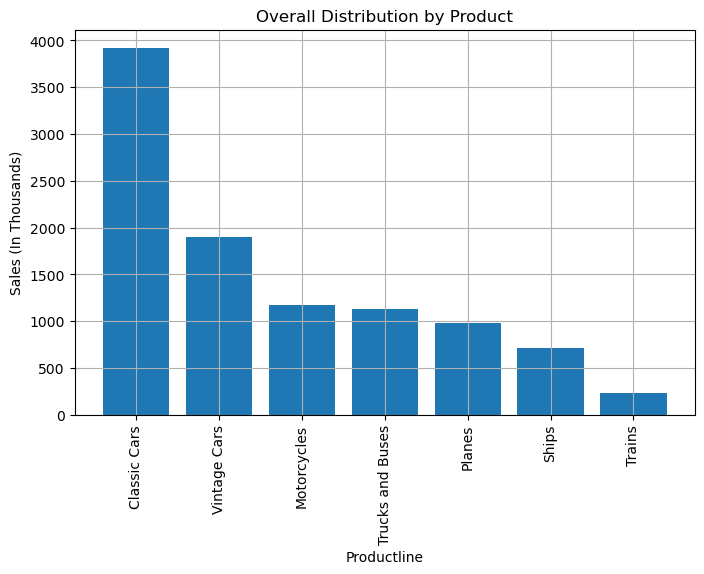

In [26]:
# Figure Size
fig = plt.figure(figsize =(8, 5))
plt.bar(_df['PRODUCTLINE'], _df['SALES']/1000)
plt.xticks(_df['PRODUCTLINE'], rotation='vertical')
plt.xlabel("Productline")
plt.ylabel("Sales (In Thousands)")
plt.title("Overall Distribution by Product") 
plt.grid(True)
# Show Plot
plt.show()

In [27]:
df['DEALSIZE'].unique()
_df = df.copy()

In [28]:
_df.loc[_df['DEALSIZE']=='Small','DEALSIZE'] = 1
_df.loc[_df['DEALSIZE']=='Medium','DEALSIZE'] = 2
_df.loc[_df['DEALSIZE']=='Large','DEALSIZE'] = 3

In [29]:
_df['DEALSIZE'].unique()

array([2, 1, 3], dtype=object)

In [30]:
df['DEALSIZE'].unique()

array(['Medium', 'Small', 'Large'], dtype=object)

In [31]:
df[['SALES','DEALSIZE']]

,SALES,DEALSIZE
578,5151.00,Medium
680,3390.00,Medium
1267,1903.22,Small
2024,1689.03,Small
1539,1404.00,Small
...,...,...
2405,1895.94,Small
393,4692.60,Medium
160,5894.94,Medium
2302,2702.04,Small


### 1. It was observed that there is a positive relationship between deal size and sales
### 2. Also, a "Large" deal size transaction with a sales of ("14082.8") is isolated from other data points. This could be a strange value or outlier.
### 3. In conclusion, sales increases as deal size also increases.

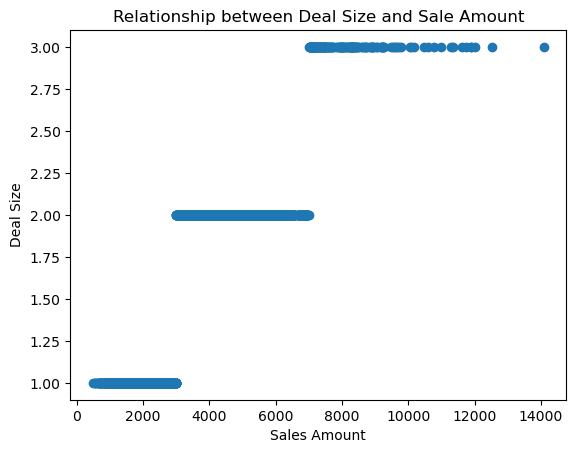

In [32]:
x = _df['SALES']
y = _df['DEALSIZE']
# Create the scatter plot
plt.scatter(x, y, marker='o')
plt.xlabel('Sales Amount')
plt.ylabel('Deal Size')
plt.title('Relationship between Deal Size and Sale Amount')

# Show the plot
plt.show()


In [33]:
#identified possible outlier
df.loc[df['SALES'] > 14000]

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,month,year,month_year
598,10407,76,100.0,2,14082.8,2005-04-22,On Hold,2,4,2005,...,CA,94217,USA,EMEA,Frick,Sue,Large,4,2005,2005-04


In [34]:
_df =  df[['YEAR_ID','PRODUCTLINE','TERRITORY','SALES']]
_df = _df.groupby(['YEAR_ID','TERRITORY'], as_index=False)["SALES"].sum()
_df['SALES_THOUSANDS'] = _df['SALES'] / 1000
_df

,YEAR_ID,TERRITORY,SALES,SALES_THOUSANDS
0,2003,APAC,496907.63,496.90763
1,2003,EMEA,3020071.91,3020.07191
2,2004,APAC,513786.93,513.78693
3,2004,EMEA,4210375.67,4210.37567
4,2005,APAC,190600.49,190.60049
5,2005,EMEA,1600886.22,1600.88622


### 1. EMEA region always has the heighest sales among all regions, with the heighest sales of 4,210,375.67 in the year 2004
### 2. The least performing region is APAC, with sales of  190,600.49 in the year 2005

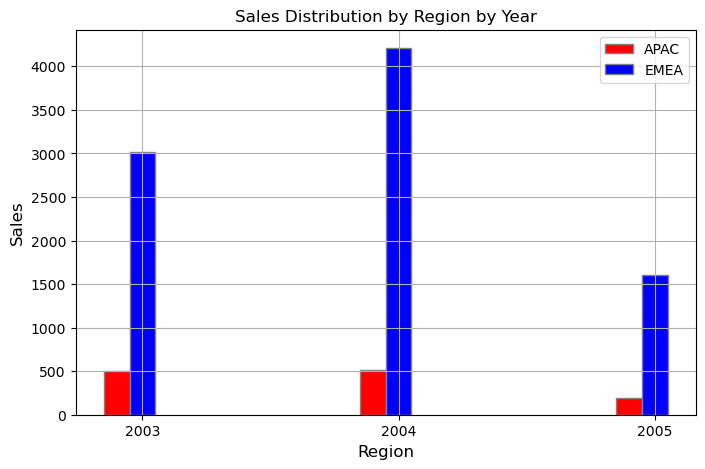

In [35]:
import numpy as np 
import matplotlib.pyplot as plt 
 
# set width of bar 
barWidth = 0.10
fig = plt.subplots(figsize =(8, 5)) 
 
# set height of bar 
APAC =  _df[(_df["TERRITORY"] == 'APAC')]['SALES_THOUSANDS'].tolist()
EMEA =  _df[(_df["TERRITORY"] == 'EMEA')]['SALES_THOUSANDS'].tolist()
Years = _df['YEAR_ID'].unique().tolist()

# Set position of bar on X axis 
brA = np.arange(len(APAC)) 
brE = [x + barWidth for x in brA] 
 
# Make the plot
plt.bar(brA, APAC, color ='r', width = barWidth, edgecolor ='grey', label ='APAC') 
plt.bar(brE, EMEA, color ='b', width = barWidth, edgecolor ='grey', label ='EMEA') 
 
# Adding Xticks 
plt.xlabel('Region', fontweight ='normal', fontsize = 12) 
plt.ylabel('Sales', fontweight ='normal', fontsize = 12) 
plt.xticks([r + barWidth for r in range(len(APAC))],Years)
plt.title('Sales Distribution by Region by Year')
plt.legend()
plt.grid(True)
plt.show() 


In [36]:
_df =  df[['YEAR_ID','PRODUCTLINE','SALES']]
_df = _df.groupby(['YEAR_ID','PRODUCTLINE'], as_index=False)["SALES"].sum()
_df['SALES_THOUSANDS'] = _df['SALES'] / 1000
_df

,YEAR_ID,PRODUCTLINE,SALES,SALES_THOUSANDS
0,2003,Classic Cars,1484785.29,1484.78529
1,2003,Motorcycles,370895.58,370.89558
2,2003,Planes,272257.60,272.25760
3,2003,Ships,244821.09,244.82109
4,2003,Trains,72802.29,72.80229
5,2003,Trucks and Buses,420429.93,420.42993
6,2003,Vintage Cars,650987.76,650.98776
7,2004,Classic Cars,1762257.09,1762.25709
8,2004,Motorcycles,560545.23,560.54523
9,2004,Planes,502671.80,502.67180


### 1. The most performing product in classic car, the follow by vintage cars
### 2. Motocycles has consistently improved in sales over the years.
### 3. While, trains has been the least patronised product.

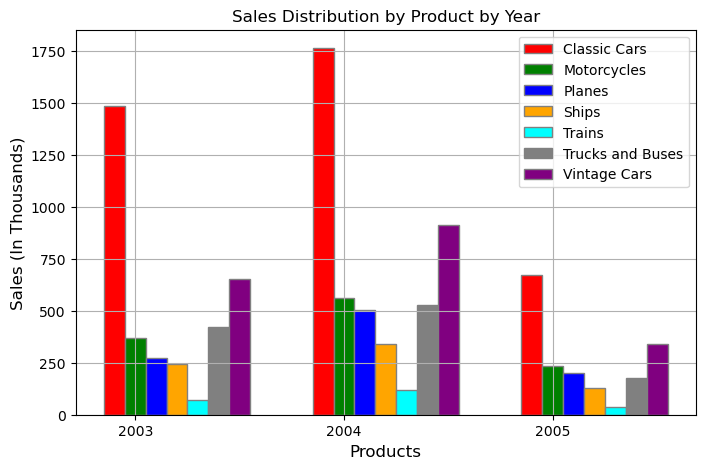

In [37]:
import numpy as np 
import matplotlib.pyplot as plt 
 
# set width of bar 
barWidth = 0.10
fig = plt.subplots(figsize =(8, 5)) 
 
# set height of bar 
Classic_Cars =  _df[(_df["PRODUCTLINE"] == 'Classic Cars')]['SALES_THOUSANDS'].tolist()
Motorcycles =  _df[(_df["PRODUCTLINE"] == 'Motorcycles')]['SALES_THOUSANDS'].tolist()
Planes =  _df[(_df["PRODUCTLINE"] == 'Planes')]['SALES_THOUSANDS'].tolist()
Ships =  _df[(_df["PRODUCTLINE"] == 'Ships')]['SALES_THOUSANDS'].tolist()
Trains =  _df[(_df["PRODUCTLINE"] == 'Trains')]['SALES_THOUSANDS'].tolist()
Trucks_Buses =  _df[(_df["PRODUCTLINE"] == 'Trucks and Buses')]['SALES_THOUSANDS'].tolist()
Vintage_Cars =  _df[(_df["PRODUCTLINE"] == 'Vintage Cars')]['SALES_THOUSANDS'].tolist()
Years = _df['YEAR_ID'].unique().tolist()

# Set position of bar on X axis 
brC = np.arange(len(Classic_Cars)) 
brM = [x + barWidth for x in brC] 
brP = [x + barWidth for x in brM] 
brS = [x + barWidth for x in brP] 
brT = [x + barWidth for x in brS] 
brTB = [x + barWidth for x in brT] 
brV = [x + barWidth for x in brTB] 
 
# Make the plot
plt.bar(brC, Classic_Cars, color ='red', width = barWidth, edgecolor ='grey', label ='Classic Cars') 
plt.bar(brM, Motorcycles, color ='green', width = barWidth, edgecolor ='grey', label ='Motorcycles') 
plt.bar(brP, Planes, color ='blue', width = barWidth, edgecolor ='grey', label ='Planes') 
plt.bar(brS, Ships, color ='orange', width = barWidth, edgecolor ='grey', label ='Ships') 
plt.bar(brT, Trains, color ='cyan', width = barWidth, edgecolor ='grey', label ='Trains') 
plt.bar(brTB, Trucks_Buses, color ='grey', width = barWidth, edgecolor ='grey', label ='Trucks and Buses') 
plt.bar(brV, Vintage_Cars, color ='purple', width = barWidth, edgecolor ='grey', label ='Vintage Cars') 
 
# Adding Xticks 

plt.xlabel('Products', fontweight ='normal', fontsize = 12) 
plt.ylabel('Sales (In Thousands)', fontweight ='normal', fontsize = 12) 
plt.xticks([r + barWidth for r in range(len(Classic_Cars))],Years)
plt.title('Sales Distribution by Product by Year')
#plt.set_title('hi')
plt.legend()
plt.grid(True)
plt.show() 


In [38]:
df[['YEAR_ID','TERRITORY','SALES']]
_df = df.groupby(['YEAR_ID','TERRITORY'], as_index=False)["SALES"].sum()
_df['TotalSales'] = _df['SALES'].sum()
_years = _df['YEAR_ID'].unique()

In [39]:
#calculating total yearly sales
for i in _years:
    y_totalSales = _df.loc[_df['YEAR_ID']== i, 'SALES'].sum()
    _df.loc[_df['YEAR_ID']== i, 'TotalSales'] = y_totalSales
    

### 1. In 2003 EMEA contribution 85.87% of total sales of 3,516,979.54, 
###     while APAC is the least contributor with only 14.12%
### 2. In 2004, EMEA contributed 89.12% of total sales of 4,724,162.60
###     while APAC still remains the least contributor with only 10.87%
### 3. Last, in 2005, EMEA is out performing between the two regions with a 
###     margin of 89.36%, while APAC is left with 10.63%, which is a bit lower than previous year

In [40]:
_df['%Sales'] =  (_df['SALES']/ _df['TotalSales']) * 100
_df.sort_values(by=['YEAR_ID','SALES'], ascending=True)

,YEAR_ID,TERRITORY,SALES,TotalSales,%Sales
0,2003,APAC,496907.63,3516979.54,14.128818
1,2003,EMEA,3020071.91,3516979.54,85.871182
2,2004,APAC,513786.93,4724162.60,10.875725
3,2004,EMEA,4210375.67,4724162.60,89.124275
4,2005,APAC,190600.49,1791486.71,10.639235
5,2005,EMEA,1600886.22,1791486.71,89.360765


In [41]:
_df = df.copy()

In [42]:
_df=_df.sort_values(by=['ORDERDATE'])
_df = _df.groupby(['month_year','PRODUCTLINE'], as_index=False)["SALES"].sum()

In [43]:
#put each months of the year in an array variable
_df_p = _df['month_year'].unique()

#convert the array variable into a dataframe 
_df_plot = pd. DataFrame(_df_p, columns=['month_year']) 

#get all the sales products
_all_products = _df['PRODUCTLINE'].unique()

#add all product a column in the new dataframe 
for i in _all_products:
    _df_plot[i]=0
    
#calculate row by row the value of each product by month    
for index,row in _df_plot.iterrows():    
    _month = row['month_year']
    for i in _all_products:
        #calculate the sales for each product per year and month
        product_month_sales = _df[(_df['month_year']== _month) & (_df['PRODUCTLINE']== i)]['SALES'].sum()
        #updating the dataframe the sales amount value
        _df_plot.loc[_df_plot['month_year']== _month, i] = product_month_sales

### 1. Classic cars is most performing product in terms of sales, follow by vintage cars.
### 2. Train is the least performing product overall
### 3. All most all the product had a spike in sales in Novembers, except planes that
###     experienced a sales drop in November 2003.
### 4. Ship record Zero sales in 5 months in 2003, and 1 month i 2004

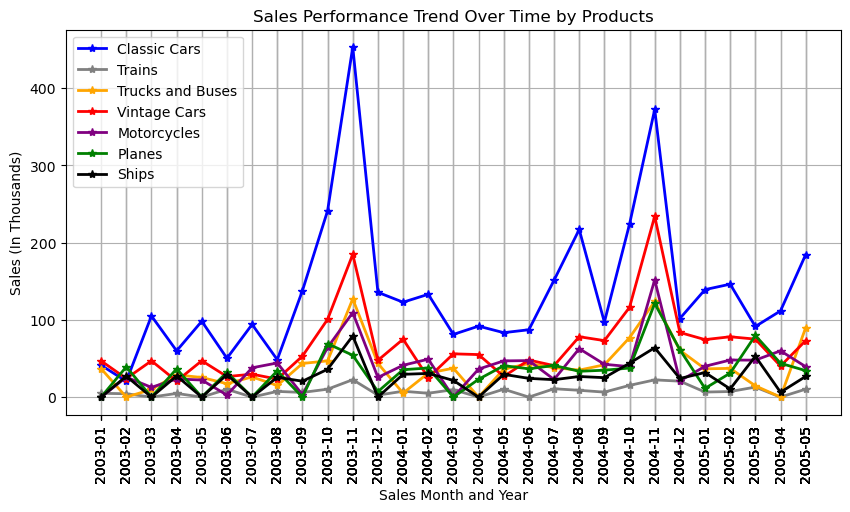

In [44]:
#plotting all the sales for each product
fig = plt.figure(figsize = (10, 5))
plt.plot(_df_plot['month_year'], _df_plot['Classic Cars']/1000, color = 'blue', linewidth=2, marker = '*', label='Classic Cars')
plt.plot(_df_plot['month_year'], _df_plot['Trains']/1000, color = 'grey', linewidth=2, marker = '*', label='Trains')
plt.plot(_df_plot['month_year'], _df_plot['Trucks and Buses']/1000, color = 'Orange', linewidth=2, marker = '*', label='Trucks and Buses')
plt.plot(_df_plot['month_year'], _df_plot['Vintage Cars']/1000, color = 'red', linewidth=2, marker = '*', label='Vintage Cars')
plt.plot(_df_plot['month_year'], _df_plot['Motorcycles']/1000, color = 'purple', linewidth=2, marker = '*', label='Motorcycles')
plt.plot(_df_plot['month_year'], _df_plot['Planes']/1000, color = 'green', linewidth=2, marker = '*', label='Planes')
plt.plot(_df_plot['month_year'], _df_plot['Ships']/1000, color = 'black', linewidth=2, marker = '*', label='Ships')
plt.xticks(_df['month_year'], rotation='vertical')
plt.xlabel("Sales Month and Year")
plt.ylabel("Sales (In Thousands)")
plt.title("Sales Performance Trend Over Time by Products")
plt.grid(True)
plt.legend()
plt.show()



In [45]:
_df = df.copy()
#df[['SALES','DEALSIZE']].corr()

In [46]:
_df.loc[_df['DEALSIZE']=='Small','DEALSIZE'] = 1
_df.loc[_df['DEALSIZE']=='Medium','DEALSIZE'] = 2
_df.loc[_df['DEALSIZE']=='Large','DEALSIZE'] = 3

In [47]:
_dt = _df[['SALES','DEALSIZE']]

In [48]:
_dt.corr()

,SALES
SALES,1.0


In [49]:
_df = df.copy()

In [50]:
_df[['YEAR_ID','PRODUCTLINE','SALES']]

#_df = _df.groupby(['month_year','PRODUCTLINE'], as_index=False)["SALES"].sum()

_df = _df.groupby(['YEAR_ID','PRODUCTLINE'], as_index=False)['SALES'].sum()

In [51]:
_df.sort_values(['YEAR_ID','SALES'], ascending = False)

,YEAR_ID,PRODUCTLINE,SALES
14,2005,Classic Cars,672573.28
20,2005,Vintage Cars,340739.31
15,2005,Motorcycles,234947.53
16,2005,Planes,200074.17
19,2005,Trucks and Buses,178057.02
17,2005,Ships,128178.07
18,2005,Trains,36917.33
7,2004,Classic Cars,1762257.09
13,2004,Vintage Cars,911423.77
8,2004,Motorcycles,560545.23


In [52]:
#put all years in the dataset in a variable
_years = _df['YEAR_ID'].unique()
d_frames = []
#loop through each year create a dataframe for each year in the dataset,with the top 3 products in sales
for i in _years:
    d = _df[_df['YEAR_ID']== i].sort_values(['SALES'], ascending= False).nlargest(3, ['SALES'])
    d_frames.append(d)
#merger the three dataframe
df_merged = pd.concat([d_frames[0], d_frames[1], d_frames[2]], ignore_index=True) 

### 1. In 2003, Classic cars, Vintage Cars, Trucks and Buses are the top 3 products.
### 2. In 2004, Classic cars, Vintage Cars, and Motorcycles made the list of top 3 products.
### 3. Lastly, in 2005, Classic cars, Vintage cars and Motorcycles are the top 3 products in terms of sales

In [53]:
df_merged

,YEAR_ID,PRODUCTLINE,SALES
0,2003,Classic Cars,1484785.29
1,2003,Vintage Cars,650987.76
2,2003,Trucks and Buses,420429.93
3,2004,Classic Cars,1762257.09
4,2004,Vintage Cars,911423.77
5,2004,Motorcycles,560545.23
6,2005,Classic Cars,672573.28
7,2005,Vintage Cars,340739.31
8,2005,Motorcycles,234947.53


In [54]:
df_merged['TotalSales']= 0
df_merged['%Sales']= 0

In [55]:
_year = _df['YEAR_ID'].unique()

In [56]:
#calculate total sales for each, and update the top 3 product merged dataframe
for i in _year:
    totalYearSales = _df[_df['YEAR_ID']== i]['SALES'].sum()
    df_merged.loc[df_merged['YEAR_ID']== i, 'TotalSales'] = totalYearSales

In [57]:
df_merged['%Sales'] = (df_merged['SALES']/df_merged['TotalSales']) * 100

### 1. In 2003, Classic cars, Vintage Cars, Trucks and Buses contributed 42.21%, 18.50%, 11.95 respectively to the year total sales.
### 2. In 2004, Classic cars, Vintage Cars, and Motorcycles contributed 37.30%, 19.29%, 11.86% respectively to the year total sales.
### 3. Lastly, in 2005, Classic cars, Vintage cars and Motorcycles contributed 37.54%, 19.01%, 13.11% respectively to the year total sales

In [58]:
df_merged

,YEAR_ID,PRODUCTLINE,SALES,TotalSales,%Sales
0,2003,Classic Cars,1484785.29,3516979.54,42.217627
1,2003,Vintage Cars,650987.76,3516979.54,18.509853
2,2003,Trucks and Buses,420429.93,3516979.54,11.954290
3,2004,Classic Cars,1762257.09,4724162.60,37.303057
4,2004,Vintage Cars,911423.77,4724162.60,19.292811
5,2004,Motorcycles,560545.23,4724162.60,11.865494
6,2005,Classic Cars,672573.28,1791486.71,37.542745
7,2005,Vintage Cars,340739.31,1791486.71,19.019918
8,2005,Motorcycles,234947.53,1791486.71,13.114668


In [59]:
_df = df.copy()

### 1. In EMEA, Medium dealsize has the heighest overall sales of 5,364,111.24, follow by Small dealsize with sales amount of 2,293,672.67. While Large dealsize has the lowest sales of 1,173,549.89

### 2. In APAC, Medium dealsize has the heighest overall sales of 723,321.00, follow by Small dealsize with sales amount of 349,404.68. While Large dealsize has the lowest sales of 128,569.37


In [60]:
_df.groupby(['TERRITORY','DEALSIZE'], as_index=False)['SALES'].sum().sort_values(['TERRITORY','SALES'], ascending=False)

,TERRITORY,DEALSIZE,SALES
4,EMEA,Medium,5364111.24
5,EMEA,Small,2293672.67
3,EMEA,Large,1173549.89
1,APAC,Medium,723321.00
2,APAC,Small,349404.68
0,APAC,Large,128569.37


### Key Observations

### 1. The overall sales trend reveals a seasonal steady increase in sale from September to November, and significant fall in December.

### 2. Overall, classic cars has the highest sales with a value of 3,919,615.66, follow by vintage cars with a value of 1,903,150.84, then motocycles with a value of 1,166,388.34.

### 3. It was observed that there is positive correlation overall, the large dealsize performed better than the medium dealsize, while the medium also performed better than the small dealsize in terms of sales.

### 4. EMEA region is the best performing region, with medium dealsize value of 5,364,111.24, follow by the small dealsize with 2,293,672.67 in value of sales, then large dealsize with 1,173,549.89 sale value.

### Also, APAC region is next, with medium dealsize value of 723,321.00, follow by the small dealsize with     349,404.68 in value of sales, then large dealsize with 128,569.37 sale value.

### 5. The products that contributed most to total sales are classic cars, vintage cars and motorcycles.





### Conclusion and Recommendation

### I will recommend the enhancement of the data collection process, to ensure that important data that could be of great value for future analysis should not be omitted, and data are validated for quality before keeing on rest. Because, missing was observed in the dataset which are important to the analysis, though this was handled by imputation.

### Also, a further investgation may be require to study the cause and impact of the seasionality observed in the sales of some products, like Ship,Vintage Cars,Planes and classic cars, from Jan 2003 till August 2003. And also, a sudden drop in sales for almost all the products Decembers.


### Lastly, an end year sales promotion initiative can be considered for implementation to improve sales in decembers and reduce the effect of whatever factor that causes the sudden sales drop


